In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [253]:
boston = load_boston()
boston

C:\Users\M.Najafi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

- Info about columns names
    - ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS: proportion of non-retail business acres per town
    - CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX: nitric oxides concentration (parts per 10 million)
    - RM: average number of rooms per dwelling
    - AGE: proportion of owner-occupied units built prior to 1940
    - DIS: weighted distances to ﬁve Boston employment centers
    - RAD: index of accessibility to radial highways
    - TAX: full-value property-tax rate per $10,000
    - PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population
    - MEDV: Median value of owner-occupied homes in $1000s

In [254]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data["Price"] = boston.target
data = data.loc[data["Price"] < 40] # Reduse noises
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.198706,0.405086,-0.064828,0.419798,-0.212511,0.354775,-0.385267,0.625818,0.581794,0.283642,-0.382084,0.459510,-0.488403
ZN,-0.198706,1.000000,-0.528317,-0.055404,-0.512295,0.309660,-0.565324,0.684478,-0.304895,-0.298528,-0.372046,0.174938,-0.421969,0.419465
INDUS,0.405086,-0.528317,1.000000,0.040593,0.768651,-0.389538,0.639564,-0.720925,0.594727,0.713181,0.372329,-0.360200,0.629017,-0.620829
CHAS,-0.064828,-0.055404,0.040593,1.000000,0.092866,0.050951,0.075836,-0.084525,-0.032681,-0.065208,-0.119143,0.043010,-0.004245,0.084253
NOX,0.419798,-0.512295,0.768651,0.092866,1.000000,-0.321772,0.725946,-0.768588,0.613170,0.668857,0.187971,-0.382447,0.613465,-0.570600
RM,-0.212511,0.309660,-0.389538,0.050951,-0.321772,1.000000,-0.262007,0.259596,-0.180539,-0.253764,-0.231061,0.104898,-0.587956,0.602755
AGE,0.354775,-0.565324,0.639564,0.075836,0.725946,-0.262007,1.000000,-0.743098,0.453478,0.502142,0.275670,-0.278426,0.644072,-0.535058
DIS,-0.385267,0.684478,-0.720925,-0.084525,-0.768588,0.259596,-0.743098,1.000000,-0.496602,-0.539234,-0.263740,0.300698,-0.548188,0.420821
RAD,0.625818,-0.304895,0.594727,-0.032681,0.613170,-0.180539,0.453478,-0.496602,1.000000,0.910463,0.453893,-0.449226,0.506347,-0.509836
TAX,0.581794,-0.298528,0.713181,-0.065208,0.668857,-0.253764,0.502142,-0.539234,0.910463,1.000000,0.441404,-0.445670,0.557087,-0.597001


In [255]:
X = data[["ZN", "RM"]].values
X.shape

(475, 2)

In [256]:
Y = data["Price"].values
Y = Y.reshape(-1, 1)
Y.shape

(475, 1)

In [257]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print(X_train.shape, Y_train.shape)

(356, 2) (356, 1)


In [258]:
class Perceptron:
    def __init__(self, epochs=4, learning_rate=0.0001):
        # Hyper Parameters
        self.epochs = epochs
        self.lr = learning_rate
        self.W = np.random.rand(1, 2)
    
    def fit(self, X, Y):
        N = X.shape[0]
        xx = np.arange(X[:, 0].min(),X[:, 0].max())
        yy = np.arange(X[:, 1].min(),X[:, 1].max())
        xx, yy = np.meshgrid(xx, yy)
        fig = plt.figure(figsize=(12, 6))
        Errors = []
        
        for epoch in range(self.epochs):
            for i in range(N):
                x = X[i].reshape(-1, 1)
                y_pred = np.matmul(self.W, x) 
                e = Y[i] - y_pred # just 1 Error
                
                # Update Weights
                x = x.reshape(1, 2)
                self.W += self.lr * e * x
                            
                # calculate loss function
                W = self.W.reshape(2, 1)
                Y_pred = np.matmul(X, W)
                Error = np.mean(np.abs(Y - Y_pred)) # MAE
                Errors.append(Error)

        # Visualization
        ax1 = fig.add_subplot(121, projection="3d")
        ax1.scatter(X[:, 0], X[:, 1], Y, c='green')
        Z = xx * self.W[0, 0]  + yy * self.W[0, 1]
        ax1.plot_surface(xx, yy, Z, alpha=0.5)
        ax1.set_xlabel("ZN")
        ax1.set_ylabel("RM")
        ax1.set_zlabel("Price")

        ax2 = fig.add_subplot(122)
        ax2.plot(Errors)
        ax2.set_title("MAE Loss")
        
        plt.show()
        
        print("Training complete successfully")
        
    def predict(self, X_test):
        W = self.W.T
        Y_pred = np.matmul(X_test, W)
        return Y_pred
    
    def evaluate(self, X_test, Y_true):
        Y_pred = self.predict(X_test)
        MAE_loss = np.mean(np.abs(Y_true - Y_pred))
        return MAE_loss

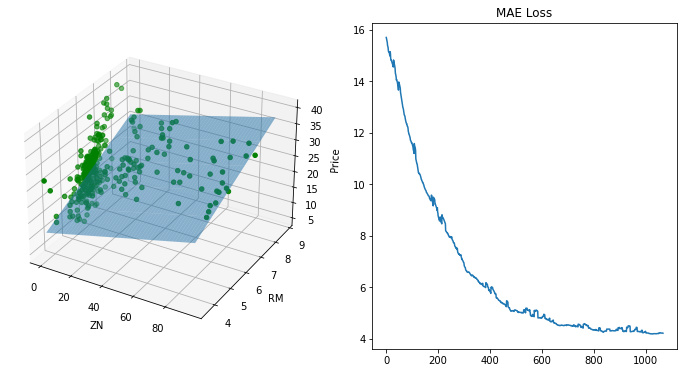

Training complete successfully


In [259]:
perceptron = Perceptron(epochs=3, learning_rate=0.0001)
perceptron.fit(X_train, Y_train)

In [260]:
print("The result of Predict function:\n", perceptron.predict(X_test))

The result of Predict function:
 [[19.34430942]
 [20.0847056 ]
 [24.50665146]
 [25.71910244]
 [27.62781944]
 [18.19365928]
 [19.83516848]
 [19.50686664]
 [20.46441655]
 [18.73232929]
 [20.33558973]
 [26.96258981]
 [20.42616779]
 [25.52764524]
 [26.27113015]
 [20.4535234 ]
 [20.61386677]
 [20.84557317]
 [19.4463061 ]
 [28.37150972]
 [15.97523131]
 [32.67768241]
 [26.21282879]
 [21.23216835]
 [19.65667427]
 [15.70111521]
 [33.45530045]
 [19.58336415]
 [19.48774226]
 [24.39509258]
 [25.99284508]
 [18.96182184]
 [20.32284014]
 [18.7227671 ]
 [19.85429286]
 [17.89085661]
 [20.70214033]
 [18.59527124]
 [19.18812699]
 [22.15559314]
 [32.07731826]
 [33.53919966]
 [16.23341042]
 [22.56357989]
 [20.59376885]
 [24.17094793]
 [21.43842892]
 [19.92122818]
 [18.11078697]
 [19.07656811]
 [21.40336756]
 [24.60011286]
 [18.77695284]
 [17.38087317]
 [21.65517189]
 [20.11884677]
 [18.97138402]
 [20.13159635]
 [18.3562165 ]
 [28.21770119]
 [32.23463429]
 [20.18578209]
 [14.40384483]
 [13.92254795]
 [21.61

In [261]:
print("The result of Evaluate function:", perceptron.evaluate(X_test, Y_test))

The result of Evaluate function: 4.3236739402049365
